In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [2]:
x_train = np.array([
    [2104, 5, 1, 45], 
    [1416, 3, 2, 40], 
    [852, 2, 1, 35]
    ])
y_train = np.array([460, 232, 178])

In [3]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

### Model prediction with multiple variables
+ The model's prediction with multiple variables is given by the linear model:
$$
f_{w, b}(x) = w_0x_0 + w_1x_1 + w_2x_2 + ... +  w_{n - 1}x_{n - 1} + b
$$
+ or in vector notation:
$$
f_{w, b}(x) = w\cdot x + b
$$
+ The equation for cost function with multiple variables $J(w, b)$
$$
J(w, b) = \frac{1}{2m} \sum_{i = 0}^{m - 1}(f_{w, b}(x^{(i)}) - y^{(i)})^2
$$


In [4]:
def compute_cost(x, y, w, b):            
  """
  compute cost
  Args:
    X (ndarray (m,n)): Data, m examples with n features
    y (ndarray (m,)) : target values
    w (ndarray (n,)) : model parameters  
    b (scalar)       : model parameter
    
  Returns:
    cost (scalar): cost
  """
  m = x.shape[0]
  cost = 0.0
  for i in range(m):
    cost += (np.dot(w, x[i]) + b - y[i])**2
  return cost / (2  * m)

In [5]:
f_wb = compute_cost(x_train, y_train, w_init, b_init)
f_wb

1.5578904330213735e-12

### Gradient Descent with multiple variables
+ Gradient descent for multiple variables:
$$
w_j = w_j - \alpha \frac{\partial J(w, b)}{\partial w_j} \quad \forall j \in [0;n-1]
$$
$$
b = b - \alpha \frac{\partial J(w, b)}{\partial b}
$$
+ n is the number of features
$$
\frac{\partial J(w, b)}{\partial w_j} = \frac{1}{m} \sum_{i = 0}^{m - 1} (f_{w, b}(x^{(i)}) - y^{(i)}) \cdot  x_{j}^{(i)}
$$
$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i = 0}^{m - 1} (f_{w, b}(x^{(i)}) - y^{(i)})
$$
+ m number of training examples in data set
+ $f_{w, b}(x^{(i)})$ is the model's prediction
+ $y^{(i)}$ target value

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

In [6]:
def compute_gradient(x, y, w, b):
  """
  Computes the gradient for linear regression 
  Args:
    X (ndarray (m,n)): Data, m examples with n features
    y (ndarray (m,)) : target values
    w (ndarray (n,)) : model parameters  
    b (scalar)       : model parameter
    
  Returns:
    dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
    dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
  """
  m,n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.0
  for i in range(m):
    err = (np.dot(x[i], w) + b) - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * x[i, j]
    dj_db = dj_db + err
  dj_dw /= m
  dj_db /= m
  return dj_dw, dj_db


In [7]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
  """
  Performs batch gradient descent to learn w and b. Updates w and b by taking 
  num_iters gradient steps with learning rate alpha
  
  Args:
    X (ndarray (m,n))   : Data, m examples with n features
    y (ndarray (m,))    : target values
    w_in (ndarray (n,)) : initial model parameters  
    b_in (scalar)       : initial model parameter
    cost_function       : function to compute cost
    gradient_function   : function to compute the gradient
    alpha (float)       : Learning rate
    num_iters (int)     : number of iterations to run gradient descent
    
  Returns:
    w (ndarray (n,)) : Updated values of parameters 
    b (scalar)       : Updated value of parameter 
  """
  w_out = copy.deepcopy(w_in)
  b_out = b_in
  J_history = []
  for i in range(num_iters):
    dj_dw, dj_db = gradient_function(x, y, w_out, b_in)
    w_out -= alpha * dj_dw
    b_out -= alpha * dj_db
    if i < 100000:
      J_history.append(cost_function(x, y, w_out, b_out))
  return w_out, b_out, J_history

In [8]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(w_final)
print(b_final)


[ 0.20396437  0.0037492  -0.01124879 -0.06586307]
-0.0022354659580536775


Text(0.5, 0, 'iteration step')

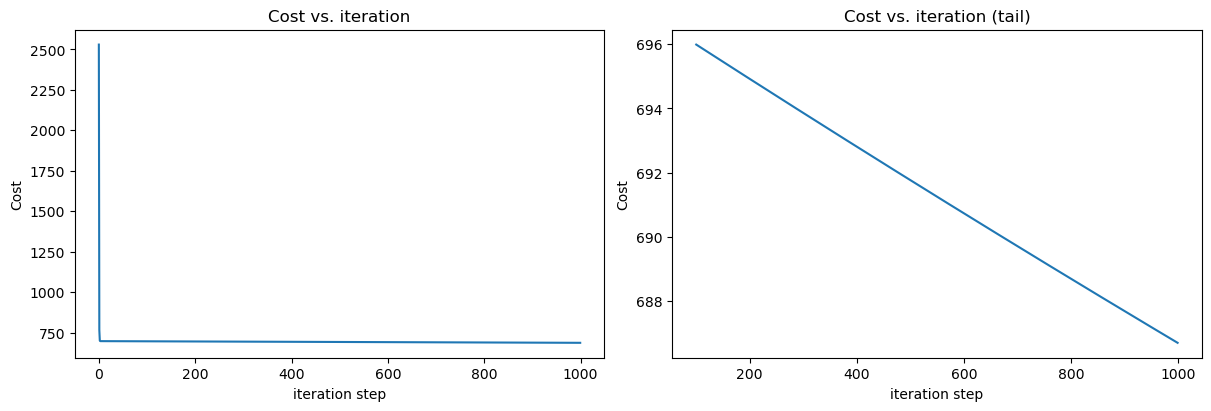

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")  
ax1.set_ylabel('Cost')               
ax1.set_xlabel('iteration step')   

ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax2.set_title("Cost vs. iteration (tail)")
ax2.set_ylabel('Cost') 
ax2.set_xlabel('iteration step') 